In [3]:
import pandas as pd
import numpy as np
print("Rushabh")

Rushabh


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")

<Axes: >

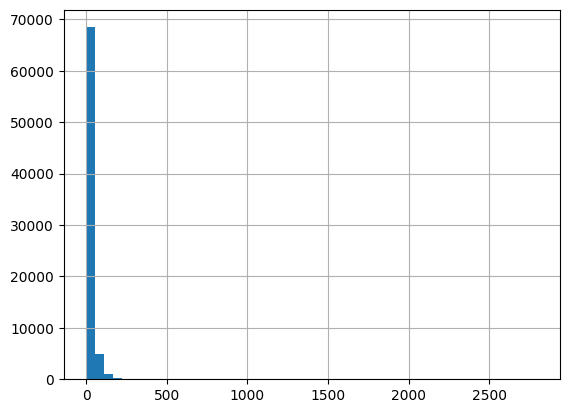

In [6]:
df["price"].hist(bins=50)



In [7]:
df["price"].skew()

np.float64(13.601388975432753)

In [8]:

df["log_price"] = np.log1p(df["price"])  # log transformation kiya hai model train hone ke baad vapas 2 functions lagane hai

<Axes: >

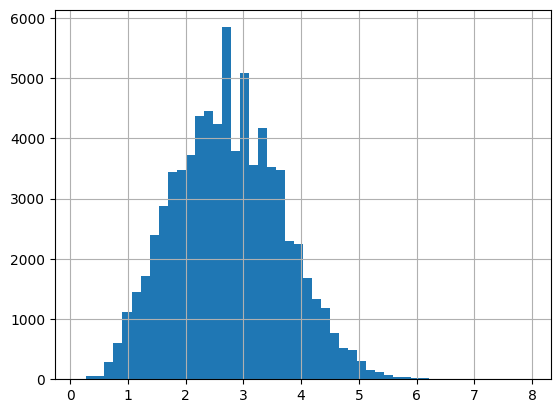

In [9]:
df["log_price"].hist(bins=50)

In [10]:
q1 = df["log_price"].quantile(0.25)   # safe from outlier
q3 = df["log_price"].quantile(0.75)
iqr = q3 - q1
lst = []
for i in df["log_price"]:
  if i < q1 - 1.5 * iqr or i > q3 + 1.5 * iqr:
    lst.append(i)
print(len(lst))

242


In [11]:
df.head(11)

,sample_id,catalog_content,image_link,price,log_price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,4.211979
5,9259,"Item Name: Member's Mark Member's Mark, Basil,...",https://m.media-amazon.com/images/I/81nw0HXpCR...,18.50,2.970414
6,191846,Item Name: Goya Foods Sazonador Total Seasonin...,https://m.media-amazon.com/images/I/61dH2Ebkt0...,5.99,1.944481
7,222007,Item Name: VineCo Original Series Chilean Sauv...,https://m.media-amazon.com/images/I/71JllaFpxM...,94.00,4.553877
8,37614,Item Name: NATURES PATH CEREAL FLK MULTIGRAIN ...,https://m.media-amazon.com/images/I/21O9RftI2v...,35.74,3.603866
9,238044,Item Name: Mrs. Miller's Seedless Black Raspbe...,https://m.media-amazon.com/images/I/41miQk+RkJ...,31.80,3.490429


In [12]:
df['catalog_content'][5]

"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano\nBullet Point 2: Large Size, Chef Bottle\nBullet Point 3: Packed in the USA\nValue: 6.25\nUnit: ounce\n"

In [13]:
!pip install ftfy            #-- yeh run kariyo agar next cell mai error aaye toh......

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [14]:
import ftfy
df['catalog_content'] = df['catalog_content'].apply(lambda x : ftfy.fix_text(x))

In [15]:
print(df['catalog_content'][5])

Item Name: Member's Mark Member's Mark, Basil, 6.25 oz
Bullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano
Bullet Point 2: Large Size, Chef Bottle
Bullet Point 3: Packed in the USA
Value: 6.25
Unit: ounce



In [16]:
import re
df['catalog_content'] = df['catalog_content'].apply(lambda x : re.sub(r'[^\w\s]', '',x))


In [17]:
df['catalog_content'] = df['catalog_content'].apply(lambda x : x.lower())

In [18]:
df['catalog_content'] = df['catalog_content'].apply(lambda x : x.replace("\n",""))

In [19]:
df['catalog_content'][5]

'item name members mark members mark basil 625 ozbullet point 1 green herb italian staple great mixed with oreganobullet point 2 large size chef bottlebullet point 3 packed in the usavalue 625unit ounce'

In [21]:
df['catalog_content'].isnull().sum()

np.int64(0)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.head()

,sample_id,catalog_content,image_link,price,log_price
0,33127,item name la victoria green taco sauce mild 12...,https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,1.773256
1,198967,item name salerno cookies the original butter ...,https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,2.647592
2,261251,item name bear creek hearty soup bowl creamy c...,https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,1.088562
3,55858,item name judees blue cheese powder 1125 oz g...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,3.444895
4,292686,item name kedem sherry cooking wine 127 ounce ...,https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,4.211979


In [24]:
def smape(y_true, y_pred, eps=1e-3):
    y_true = np.clip(y_true, eps, None)
    y_pred = np.clip(y_pred, eps, None)
    return np.mean(
        np.abs(y_pred - y_true) /
        ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )


In [25]:
import os
DATASET_FOLDER = '/content/drive/MyDrive/Dataset'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [26]:
import sys
sys.path.append('/content/drive/MyDrive/Dataset')


In [27]:
from utils import download_images
download_images(train['image_link'].iloc[:10000], '/content/drive/MyDrive/Dataset/images')

100%|██████████| 10000/10000 [02:36<00:00, 63.73it/s]


In [28]:
print("Downloaded:", len(os.listdir('/content/drive/MyDrive/Dataset/images')))
#print("Expected:", len(image_links))


Downloaded: 9930


In [30]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 743.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00


In [31]:
import os, numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

X=[]
names=[]

for f in os.listdir("/content/drive/MyDrive/Dataset/images"):
  img=load_img(f"/content/drive/MyDrive/Dataset/images/{f}",target_size=(224,224))
  x = preprocess_input(np.expand_dims(img_to_array(img), 0))
  X.append(model.predict(x, verbose=0)[0]); names.append(f)

np.save('/content/drive/MyDrive/Dataset/emb.npy',np.array(X))

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
X,names

([array([0.42006797, 0.5149654 , 2.4575524 , ..., 0.02253604, 0.6696005 ,
         0.14333875], dtype=float32),
  array([0.        , 0.47508186, 0.17558672, ..., 0.22528312, 1.1490699 ,
         0.25337073], dtype=float32),
  array([0.708935  , 0.30972067, 0.00761708, ..., 0.47507197, 0.9481633 ,
         0.10264987], dtype=float32),
  array([0.03292675, 0.13136   , 0.60818684, ..., 0.11664569, 0.4828376 ,
         0.60684335], dtype=float32),
  array([0.18276577, 0.09819768, 0.01307535, ..., 0.09953038, 0.00099457,
         0.4355789 ], dtype=float32),
  array([0.26211253, 0.        , 0.8355275 , ..., 0.5370243 , 1.0874609 ,
         0.11085222], dtype=float32),
  array([0.0028529 , 0.9626064 , 0.03790163, ..., 1.1586231 , 2.1757681 ,
         0.12183905], dtype=float32),
  array([0.        , 0.14108726, 0.        , ..., 0.46667263, 1.1885164 ,
         0.00272563], dtype=float32),
  array([0.3868922 , 0.5072418 , 0.1380379 , ..., 0.2102002 , 1.3796693 ,
         0.28752616], dtype=fl

In [33]:
ln=len(os.listdir('/content/drive/MyDrive/Dataset/images'))

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=30000,
    min_df=5,
    max_df=0.85,
    stop_words="english"
)

L = vectorizer.fit_transform(df["catalog_content"].iloc[:ln])


In [35]:
print(L[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [36]:
y_train = df["log_price"].iloc[:ln]
y_train.shape

(9930,)

In [37]:
def extract_pack_x(name):
    if not isinstance(name, str):
        return 1
    name = name.lower()
    if "pack of" in name:
        token = name.split("pack of")[1].strip().split()[0]
        return int(token) if token.isdigit() else 1
    return 1


In [38]:
Pack_z=df['catalog_content'].iloc[:ln].apply(extract_pack_x)

In [39]:
Pack_z

,catalog_content
0,1
1,1
2,1
3,1
4,1
...,...
9925,1
9926,1
9927,1
9928,1


In [40]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

Pack_z=Pack_z.values.reshape(-1,1)
num = StandardScaler().fit_transform(Pack_z)
num = csr_matrix(num)


In [41]:
from sklearn.preprocessing import normalize
img_emb = np.load('/content/drive/MyDrive/Dataset/emb.npy')   # shape: (n, 2048)

In [42]:
img=normalize(img_emb)

In [43]:
from scipy.sparse import hstack
X = hstack([L,img,Pack_z])
y = df["log_price"].iloc[:ln]

In [44]:

L.shape,img.shape,num.shape

((9930, 30000), (9930, 2048), (9930, 1))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size=0.2)


In [48]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.2 MB/s eta 0:00:00


In [49]:
import lightgbm as lgb
model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.262117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 688689
[LightGBM] [Info] Number of data points in the train set: 7944, number of used features: 7494
[LightGBM] [Info] Start training from score 2.733207


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=1000,
              num_leaves=63, random_state=42, subsample=0.8)

In [ ]:
# from sklearn.linear_model import Ridge  # Validation SMAPE: 0.6702485136849475
# model = Ridge(alpha=1.0)
# model.fit(X_train, y_train)


In [50]:
y_pred = model.predict(X_val)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [51]:
pred_price = np.expm1(y_pred)         # vo log use kiya tha n upar usse thik karne ko kiya
pred_price = np.clip(pred_price, 1.0, None)

In [52]:
true_price = np.expm1(y_val)

val_smape = smape(true_price, pred_price)
print("Validation SMAPE:", val_smape)

Validation SMAPE: 0.6096119999857368
